In [108]:
import pandas as pd

# Load the positive and negative reviews
with open('rt-polarity.pos', 'r', encoding='latin-1') as pos_file:
    positive_reviews = pos_file.readlines()

with open('rt-polarity.neg', 'r', encoding='latin-1') as neg_file:
    negative_reviews = neg_file.readlines()

# Create a DataFrame
data = pd.DataFrame({
    'review': positive_reviews + negative_reviews,
    'label': [1] * len(positive_reviews) + [0] * len(negative_reviews)  # 1 for positive, 0 for negative
})

data.tail()

,review,label
10657,a terrible movie that some people will neverth...,0
10658,there are many definitions of 'time waster' bu...,0
10659,"as it stands , crocodile hunter has the hurrie...",0
10660,the thing looks like a made-for-home-video qui...,0
10661,"enigma is well-made , but it's just too dry an...",0


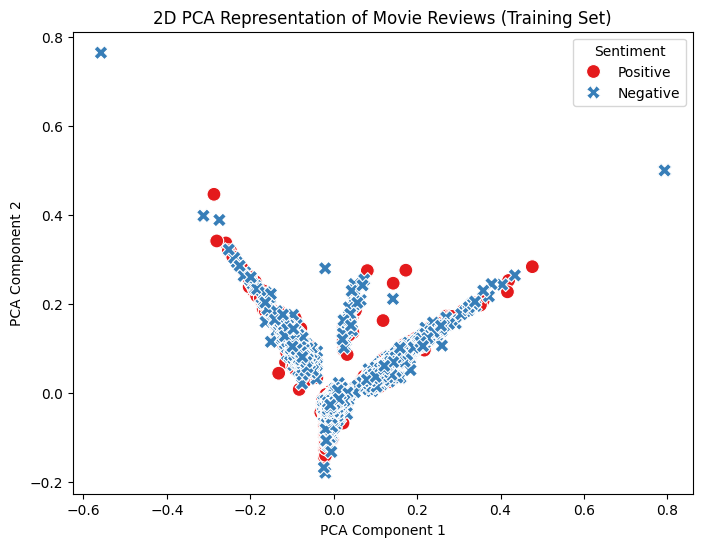

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Define text preprocessing function
def preprocess_text_advanced(text):
    stop_words = set(stopwords.words('english'))  # Load stopwords from NLTK
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Load the positive and negative reviews
with open('rt-polarity.pos', 'r', encoding='latin-1') as pos_file:
    positive_reviews = pos_file.readlines()

with open('rt-polarity.neg', 'r', encoding='latin-1') as neg_file:
    negative_reviews = neg_file.readlines()


# Combine the reviews into a DataFrame
data = pd.DataFrame({
    'review': positive_reviews + negative_reviews,
    'label': [1] * len(positive_reviews) + [0] * len(negative_reviews)  # 1 for positive, 0 for negative
})

# Preprocess the reviews
data['review'] = data['review'].apply(preprocess_text_advanced)

# Vectorize the data with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['review'])

# Use PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense array

# Add the PCA components to the data for plotting
data['pca1'] = X_pca[:, 0]
data['pca2'] = X_pca[:, 1]
data['label'] = data['label'].map({0: 'Negative', 1: 'Positive'})  # Map labels to their corresponding sentiment

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='label', style='label', palette='Set1', s=100)

plt.title("2D PCA Representation of Movie Reviews (Training Set)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Sentiment')
plt.show()


In [110]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from nltk.corpus import stopwords


In [111]:
data = pd.DataFrame({
    'review': positive_reviews + negative_reviews,
    'label': [1] * len(positive_reviews) + [0] * len(negative_reviews)  # 1 for positive, 0 for negative
})

In [112]:
# Step 2: Preprocess the text data
def preprocess_text_advanced(text):
    stop_words = set(stopwords.words('english'))  # Load stopwords from NLTK
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)


In [113]:
# Apply preprocessing to the reviews
data['review'] = data['review'].apply(preprocess_text_advanced)

In [114]:
# Step 3: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Use unigrams and bigrams
X = vectorizer.fit_transform(data['review'])
y = data['label']

In [115]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [116]:
# Step 5: Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [117]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)


In [118]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1067
           1       0.76      0.76      0.76      1066

    accuracy                           0.76      2133
   macro avg       0.76      0.76      0.76      2133
weighted avg       0.76      0.76      0.76      2133



In [119]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.7576183778715424


In [120]:
# Step 7: Test with a new review (predicting sentiment for a custom review)
sample_review = ["The plot was amazing, but the acting was amazing!"]  # Custom review
sample_review_preprocessed = [preprocess_text_advanced(review) for review in sample_review]
sample_vec = vectorizer.transform(sample_review_preprocessed)
sample_prediction = model.predict(sample_vec)

print("\nCustom Review Prediction:")
print(f"Review: {sample_review[0]}")
print(f"Sentiment: {'Positive' if sample_prediction[0] == 1 else 'Negative'}")


Custom Review Prediction:
Review: The plot was amazing, but the acting was amazing!
Sentiment: Positive


In [121]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [122]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)

In [123]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1067
           1       0.75      0.76      0.75      1066

    accuracy                           0.75      2133
   macro avg       0.75      0.75      0.75      2133
weighted avg       0.75      0.75      0.75      2133



In [124]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)



Accuracy: 0.7529301453352086


In [125]:

# Step 5: Train a Support Vector Machine classifier (SVM)
model = SVC(kernel='linear', class_weight='balanced')  # Using linear kernel and handling class imbalance
model.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear')

In [126]:
# Evaluate the model
y_pred = model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1067
           1       0.75      0.74      0.74      1066

    accuracy                           0.74      2133
   macro avg       0.74      0.74      0.74      2133
weighted avg       0.74      0.74      0.74      2133


Accuracy: 0.7449601500234412


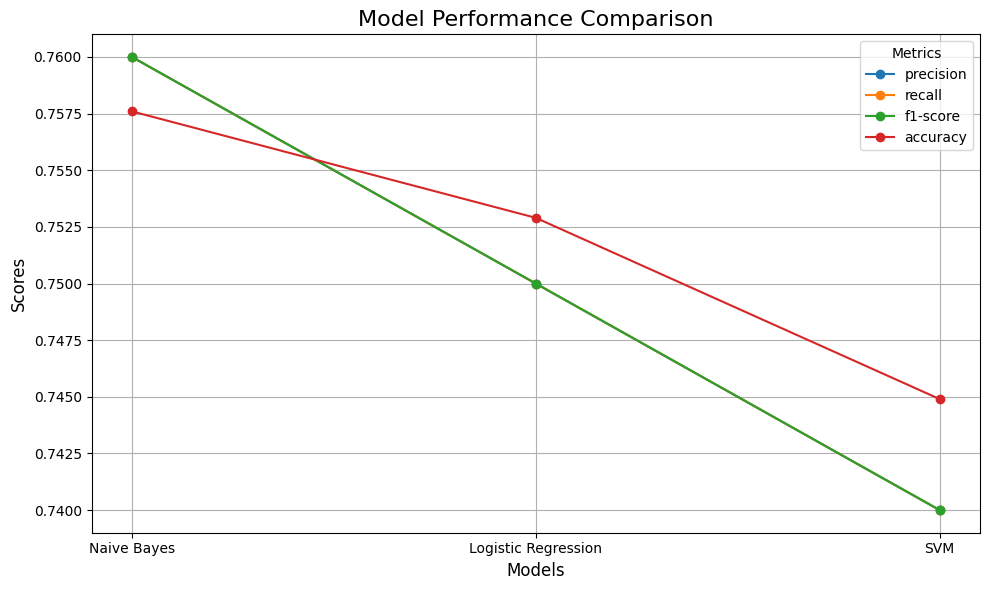

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation results for each model
evaluation_results = {
    "Naive Bayes": {
        "precision": 0.76,
        "recall": 0.76,
        "f1-score": 0.76,
        "accuracy": 0.7576  # Rounded accuracy
    },
    "Logistic Regression": {
        "precision": 0.75,
        "recall": 0.75,
        "f1-score": 0.75,
        "accuracy": 0.7529
    },
    "SVM": {
        "precision": 0.74,
        "recall": 0.74,
        "f1-score": 0.74,
        "accuracy": 0.7449
    }
}

# Extract the models and metrics
models = list(evaluation_results.keys())
metrics = list(evaluation_results[models[0]].keys())

# Prepare data for plotting
metric_values = {metric: [evaluation_results[model][metric] for model in models] for metric in metrics}

# Plotting the line graph
plt.figure(figsize=(10, 6))

for metric, values in metric_values.items():
    plt.plot(models, values, marker='o', label=metric)

# Add labels, title, and legend
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Performance Comparison', fontsize=16)
plt.legend(title="Metrics", fontsize=10)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
